# Practical 1) Creating binned size distributions and calculating PM2.5

<div class="alert alert-block alert-success">
<b>Objectives:</b> The objectives of todays practical are:

 - 1) [Objective 1 - Practice changing the shape of a normal and log-normal distribution ](#Part1)
      * [Exercise 1: Create 3 normal distributions and plot the results](#Exercise1)
      * [Exercise 2: Create 3 log-normal distributions and plot the results](#Exercise2)
 - 2) [Objective 2 - Populate a discrete 'binned' size distribution from a continuous function](#Part2)
      * [Exercise 3: Create a discrete size distribution with 30 bins](#Exercise3)
 - 3) [Objective 3 - Calculate PM2.5 mass](#Part3)
      * [Exercise 4: Sum to the total particulate mass for a range of environments](#Exercise4)

</div>

<div class="alert alert-block alert-success">
<b> Exercise 1. Create 3 normal distributions and plot the results <a name="Exercise1"> </b> 
    
Using the defition of a normal distribution, you are tasked with now creating three different distributions and plotting the results. We are going to assume that each distribution has the same mean of 0 but 3 different standard deviations of 0.3, 1.0 and 1.3.

We are going to use the Numpy and Matplotlib libraries to create our arrays and plot results accordingly. As already noted above, this warm-up exercise will help you get a renewed feel for Python programming. You may find the following functions useful, assuming we have imported ```python numpy as np```:

```python
   np.linspace(lower, upper, num=xxx) # Creates an array with a lower and upper limit with xxx entries
   np.exp(xxx) # Calculates the exponential of a constant, variable or Numpy array
   np.sqrt(xxx) # Calculates the square root of a constant, variable or Numpy array
   np.pi # Gives us the constant 'pi'

```

In the code snippet below, as part of this exercise, I have imported the relevant libraries for you and also provided a plotting function. Notice I have assumed our x variable is called 'x' and our 3 different distributions are called 'distribution_1','distribution_2' and 'distribution_3'. 

</div>

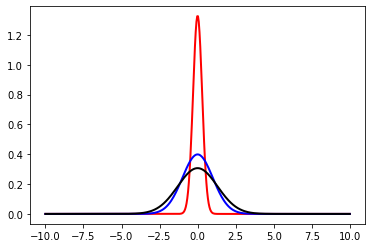

In [1]:
# plot 3 different normal distributions with the same mean [0] but 3 different standard deviations of 0.3,1.0 and 1.3

import numpy as np
import matplotlib.pyplot as plt

#------'INSERT CODE HERE'------

# Define lower and upper limit of the size distribution [microns]
lower_size = -10
upper_size = 10

# Use the above information and the fact we want to create 400 values to create a numpy array
x = np.linspace(lower_size, upper_size, num=400) # values for x-axis

# Define the mean and standard deviation for each normal distribution
sigma1 = 0.3
mean1 = 0.0

sigma2 = 1.0
mean2 = 0.0

sigma3 = 1.3
mean3 = 0.0

# Now create each distribution using the mean, standard deviation and x array
distribution_1 = (np.exp(-(x - mean1)**2 / (2 * sigma1**2)) / (sigma1 * np.sqrt(2 * np.pi)))
distribution_2 = (np.exp(-(x - mean2)**2 / (2 * sigma2**2)) / (sigma2 * np.sqrt(2 * np.pi)))
distribution_3 = (np.exp(-(x - mean3)**2 / (2 * sigma3**2)) / (sigma3 * np.sqrt(2 * np.pi)))

#------------------------------

plt.plot(x, distribution_1 , linewidth=2, color='r')
plt.plot(x, distribution_2 , linewidth=2, color='b')
plt.plot(x, distribution_3 , linewidth=2, color='k')
plt.show()

<div class="alert alert-block alert-success">
<b> Exercise 2. Create 3 lognormal distributions and plot the results <a name="Exercise2"> </b> 
    
Using the defition of a log-normal distribution, you are tasked with now creating three and plotting the results. We are going to assume that each distribution has the same mean [in log space] but 3 different geometric standard deviations of 0.3, 1.0 and 1.3. As before, we are going to use the Numpy and Matplotlib libraries to create our arrays and plot results accordingly. I have imported the relevant libraries for you and also provided a plotting function. Notice I have assumed our x variable is now named 'x_log' to go into our definition of the lognormal. Also note that this time we are assuming we are using microns as our x axis. Again I assume our 3 different distributions are called 'distribution_1','distribution_2' and 'distribution_3'.  

You should define an x array that has a lower limit of 0.01 microns [10nm] and 20 microns and has 400 values. Your geomtric standard deviations are 0.3, 1.0 and 1.3. Your mean diameter in this problem is 800nm.
</div>

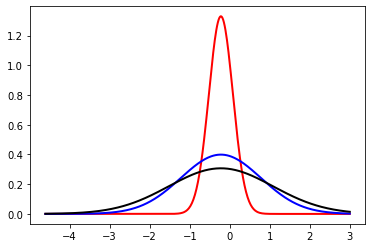

In [2]:
# plot 3 different log-normal distributions with a mean diameter of 800nm and geometric standard deviation of 0.3, 0.6 and 1.1
# This time assume our smallest starying point is 10nm and largest is 20 microns

import numpy as np
import matplotlib.pyplot as plt

# Define lower and upper limit of the size distribution [microns]
lower_size = 0.01
upper_size = 20

#------'INSERT CODE HERE'------
x_log = np.linspace(np.log(lower_size), np.log(upper_size), num=400) # values for x-axis
sigmag1 = 0.3
mean1 = np.log(0.8)

sigmag2 = 1.0
mean2 = np.log(0.8)

sigmag3 = 1.3
mean3 = np.log(0.8)

distribution_1 = (np.exp(-(x_log - mean1)**2 / (2 * sigmag1**2)) / (sigmag1 * np.sqrt(2 * np.pi)))
distribution_2 = (np.exp(-(x_log - mean2)**2 / (2 * sigmag2**2)) / (sigmag2 * np.sqrt(2 * np.pi)))
distribution_3 = (np.exp(-(x_log - mean3)**2 / (2 * sigmag3**2)) / (sigmag3 * np.sqrt(2 * np.pi)))
#------------------------------

plt.plot(x_log, distribution_1 , linewidth=2, color='r')
plt.plot(x_log, distribution_2 , linewidth=2, color='b')
plt.plot(x_log, distribution_3 , linewidth=2, color='k')
#plt.savefig('sample_curve.png', dpi=800)
plt.show()

<div class="alert alert-block alert-success">
<b> Exercise 3. Create a discrete "volume ratio" log-normal distribution and populate number concentrations to each bin <a name="Exercise3"> </b> 
    
This is quite an involved exercise. We need to go through a series of steps to create our discrete lognormal distribution that has a mean of 150nm, standard deviation of 1.7 and total number of particles of 600 per cubic centimetre:

 - Define a lower and upper limit to our size distribution
 - Calculate a volume ratio for a specific number of bins
 - Calculate a diameter ratio
 - Create an array of diameters
 - Calculate the diameter width of each size bin
 - Calculate the log-normal probability density for our diameter array
 - Combine the last two elements with the total number to populate a discrete number distribution
 - Plot the results
 
In the code snippet below I have started the exercise with the lower and upper bin boundary and desired number of size bins [30]. I have also defined the name of each required variable and array before leaving the plotting routine. Please note we are still working in microns and the number concentration is given in number per cubic centimetre.

</div>

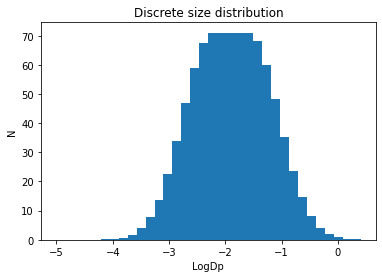

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Volume ratio discrete distribution

d1 = 0.01; # Lowest size diameter
d_Nb = 1.0; # Diameter of largest bin [microns]
Nb = 30; # Number of size bins

#------'INSERT CODE HERE'------

di = np.exp(np.linspace(np.log(d1), np.log(d_Nb), num=30)); # values for x-axis
#log_di = np.linspace(np.log(d1), np.log(d_Nb), num=30)
#print(di)

V_rat = np.power((d_Nb/d1),3.0/(Nb-1.0)); # Volume ratio between bins
d_rat = V_rat**(1.0/3.0); # Diameter ratio between bins

# Use the volume ratio to create an array of diameters as follows
d_i=np.zeros((Nb), dtype=float) # Diameter array 
d_i[0]=d1
for step in range(Nb):
    if step > 0:
       d_i[step]=d_i[step-1]*d_rat

log_di = np.log(d_i) # Log of Diameter array 

# Create an array of lower bin boundaries
vi = (4.0/3.0)*np.pi*np.power(d_i/2.0,3.0)
vi_low = 2.0*vi/(1.0+V_rat)
di_low = 2.0*(np.power(vi_low/((4.0/3.0)*np.pi),(1.0/3.0)))

d_width = d_i*np.power(2,1.0/3.0)*((np.power(V_rat,1.0/3.0)-1.0)/(np.power(1+V_rat,1.0/3.0))) # Diameter width array of size bins

# Parameters of log-normal distribution
sigmag1 = np.log(1.7); # Geometric standard deviation
mean1 = np.log(0.15); # Mean particle size [150nm]
distribution_1 = (np.exp(-(log_di - mean1)**2 / (2 * sigmag1**2)) / (sigmag1 * np.sqrt(2 * np.pi))) # Probability density distribution

Ntot = 600.0 # Total number of particles [per cm-3]
N_dist = Ntot*(distribution_1*(d_width/d_i)) # Discrete number distribution
dNdlogDP_dist = Ntot*(distribution_1*(1.0/d_i)) # Discrete number distribution

#------------------------------
plt.bar(log_di, N_dist)
plt.ylabel(r'N')
plt.xlabel(r'LogDp')
plt.title(r'Discrete size distribution')
plt.show()
plt.show()


<div class="alert alert-block alert-success">
<b> Exercise 4. Calculate the PM2.5 mass associated with the size distribution  <a name="Exercise3"> </b> 
    
Using the same distribution as above, calculate PM2.5 mass assuming the particles have a density of 1400kg.m-3 which is a good approximation for secondary organics. Please note your final answer should be given in $\mu g.m^{-3}$, so you should perhaps check unit coversions on paper. Do you arrive at a mass of ~5.14 $\mu g.m^{-3}$?

Following this, try to find some different size distributions and calculate the total PM2.5 mass. As an added challenge, rather than doing this within the jupyter notebook environment, create a seperate Python script and run this from the command line.


</div>

In [4]:
# Total mass in micrograms per cubic metre
#------'INSERT CODE HERE'------
density = 1400.0 #kg.m-3
total_mass = np.sum((4.0/3.0)*np.pi*np.power((d_i*1.0e-6)/2.0,3.0)*(N_dist*1.0e6)*density*1.0e9)
#------------------------------
print(total_mass)

5.142161209310858
